# Tugas Pertemuan 10
Klasterisasi dengan Algoritma K-Means

### Kelompok:
- **5210411135** - I Gede Widiantara
- **5210411138** - Dhea Desliana Putri

## Import Library yang diperlukan

In [643]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Membaca file CSV dengan Pandas
Dataset yang digunakan adalah Data Orang dengan Diagnosa Diabetes.

In [644]:
rawData = pd.read_csv('D:\WidiPythonEnv\Machine-Learning/5210411135\data/airbnb.csv')
rawData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Preprocessing Data
Cleansing yang dilakukkan :
- Memilih beberapa kolom yang hanya diperlukan untuk klasterisasi
- Mengkonversi type data pada kolom
- Menghilangkan value kosong yang terdapat pada data
- Mengambil beberapa sampel karena jumlah data terlalu besar (**0.15% total data**)

Normalisasi Data :
- dilakukan agar tidak ada data yang terlalu dominan dengan menggunakan StandardScaler

### Cleansing Data

In [645]:
def clean_data(rawData):
    # Select columns: 'Age', 'Value' and 2 other columns
    rawData = rawData.loc[:, ['latitude', 'longitude']]

    # Drop rows with missing data across all columns
    rawData = rawData.dropna()

    # mengambil beberapa sampel data agar tidak terlalu banyak
    rawData = rawData.sample(frac=.15)

    return rawData


data = clean_data(rawData.copy())
data.head()


,latitude,longitude
43607,40.66195,-73.89360
22116,40.76529,-73.92304
19690,40.60396,-73.95761
19329,40.82415,-73.95283
1119,40.76487,-73.98471


### Normalisasi Data

In [646]:
def normalisasi(data, cols):
    dataCopy = data.copy()

    # call minmaxscaler
    norm = StandardScaler()
    dataCopy = norm.fit_transform(dataCopy)

    # membuat DataFrame
    normalData = pd.DataFrame(data=dataCopy, columns=cols)
    return normalData

cols = data.columns.values
normalData = normalisasi(data, cols)
normalData.head()

,latitude,longitude
0,-1.228560,1.292731
1,0.646516,0.648219
2,-2.280773,-0.108600
3,1.714514,-0.003955
4,0.638895,-0.701884


## Melihat Info Data
Membuat Fungsi yang dapat menampilkan info data

In [647]:
def get_info(data):
    print('=' * 70, '\n')
    print(data.info())
    print('=' * 70, '\n')
    print(data.describe())


get_info(data)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7334 entries, 43607 to 39886
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   7334 non-null   float64
 1   longitude  7334 non-null   float64
dtypes: float64(2)
memory usage: 171.9 KB
None

          latitude    longitude
count  7334.000000  7334.000000
mean     40.729659   -73.952649
std       0.055116     0.045681
min      40.509430   -74.244420
25%      40.691403   -73.983525
50%      40.723960   -73.955655
75%      40.763307   -73.936193
max      40.904840   -73.716900


## Visualisasi Data

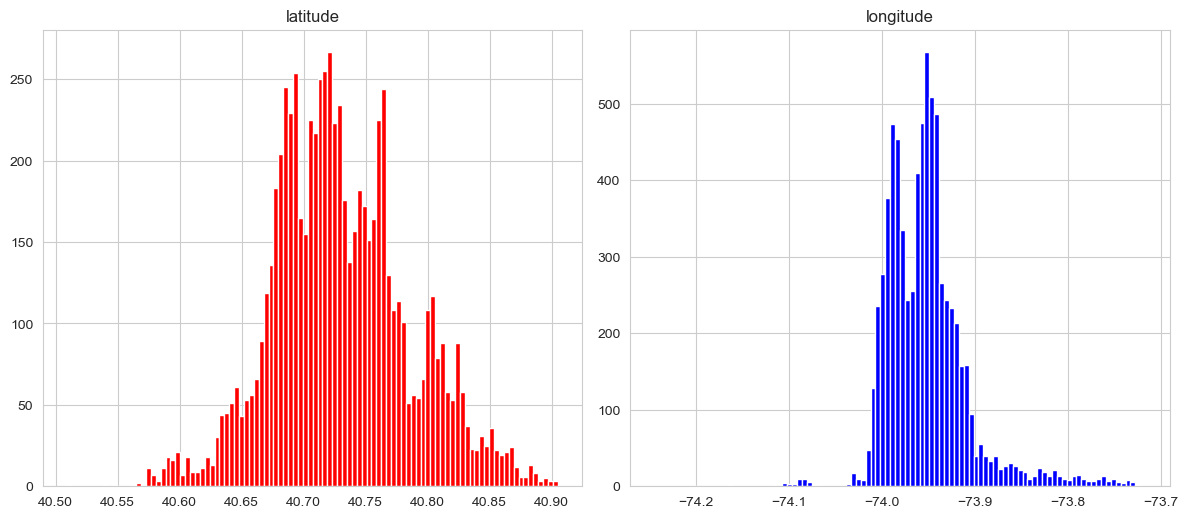

In [648]:
fig = plt.figure(figsize=(12, 10))

# Placing the plots in the plane
plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=2)
plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)
  
# Plot for Age
plot1.hist(data['latitude'], color='red', bins=100)
plot1.set_title('latitude')

# Plot for Wage
plot2.hist(data['longitude'], color='blue', bins=100)
plot2.set_title('longitude')

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

## Klasterisasi dengan K-Means

### Menentukan Feature yang dipilih

In [649]:
X = np.asarray(normalData)

X1 = X[:,0]
X2 = X[:,1]

### Visualisasi scatter sebelum Klasterisasi

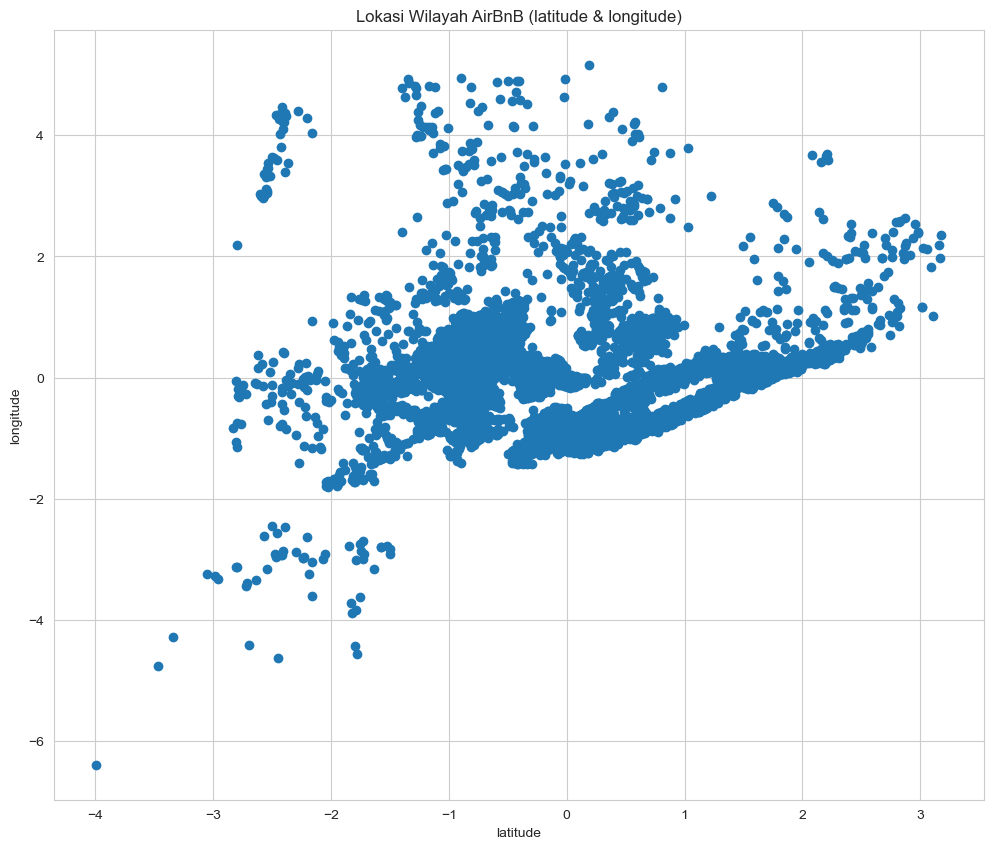

In [650]:
fig = plt.figure(figsize=(12, 10))

plt.scatter(X1, X2, label='True position')
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title('Lokasi Wilayah AirBnB (latitude & longitude)')
plt.show()

### Percobaan K-Means dengan nilai k random (4)

In [651]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init ='auto', random_state = 32)
kmeans.fit(X)

score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
print(f'Cluster Centers\t\t: \n{kmeans.cluster_centers_}\n\nLabels\t\t\t: \n{kmeans.labels_}\n\nSilhouette Score\t: {score}')

Cluster Centers		: 
[[-0.82177673  0.1227896 ]
 [ 1.3105756   0.32606722]
 [ 0.06198506 -0.83291217]
 [-0.32219018  2.8688498 ]]

Labels			: 
[0 1 0 ... 1 0 0]

Silhouette Score	: 0.4253981209698335


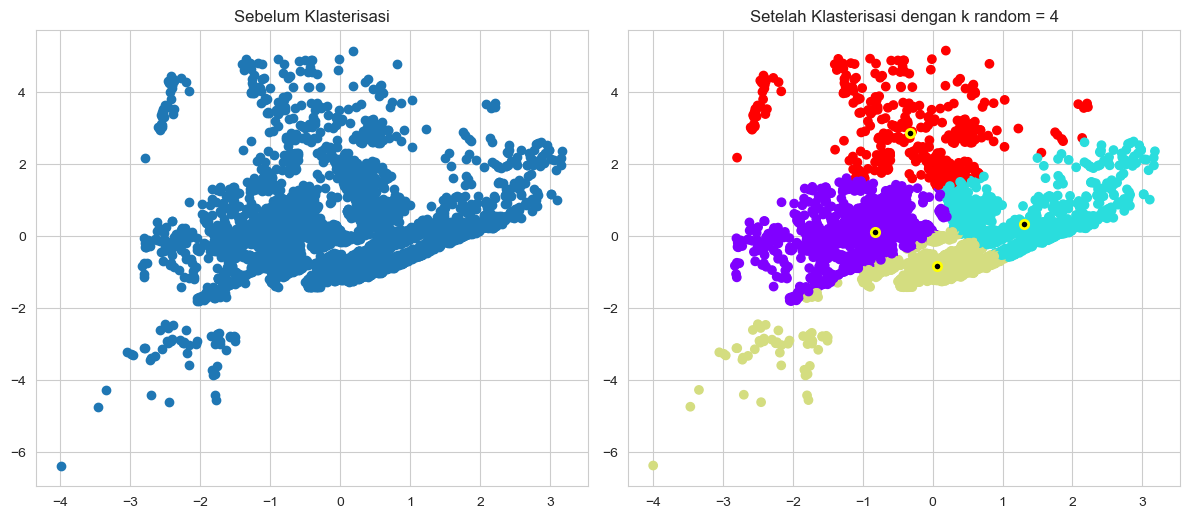

In [652]:
fig = plt.figure(figsize=(12,10))

plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=2)
plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)

# Plot for Age vs Wage
plot1.scatter(X1, X2)
plot1.set_title('Sebelum Klasterisasi')

# Plot for Age vs Rating
plot2.scatter(X1, X2, c=kmeans.labels_, cmap='rainbow')
plot2.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],  color='black', edgecolors='yellow', linewidths=2)
plot2.set_title('Setelah Klasterisasi dengan k random = 4')

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

### Mencari nilai cluster optimal dengan Silhouette Score

In [653]:
ks = 25

sil_score = np.zeros(ks)
for k in range(1, ks+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto',random_state=32)
    kmeans.fit(X)

    if k != 1:
        s_score = metrics.silhouette_score(
            X, kmeans.labels_, metric='euclidean')
        sil_score[k-1] = s_score

sil_score

array([0.        , 0.40922863, 0.38438296, 0.42539812, 0.42853097,
       0.43780297, 0.39100888, 0.41242538, 0.393157  , 0.41005527,
       0.41482127, 0.40052808, 0.41504256, 0.42030522, 0.42229038,
       0.42023419, 0.41386631, 0.41315845, 0.40022993, 0.41479868,
       0.4094949 , 0.41203115, 0.41104162, 0.3936282 , 0.38836325])

### Visualisasi nilai cluster optimeal

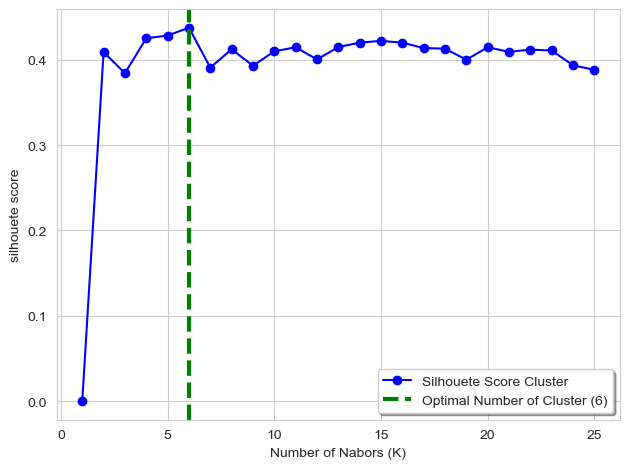

Cluster Optimal		: 6
Silhouette Score	: 0.4378029693033528


In [654]:
plt.plot(range(1, ks+1), sil_score, 'bo-', label='Silhouete Score Cluster')
plt.ylabel('silhouete score')
plt.xlabel('Number of Nabors (K)')

kmax = np.argmax(sil_score) + 1
plt.axvline(x=kmax, linestyle='--', c='green', linewidth=3, label=f'Optimal Number of Cluster ({kmax})')

plt.legend(shadow=True)
plt.tight_layout()
plt.show()

print(f'Cluster Optimal\t\t: {kmax}\nSilhouette Score\t: {sil_score[kmax-1]}')

### Perbandingan Cluster Random dengan Cluster Optimal

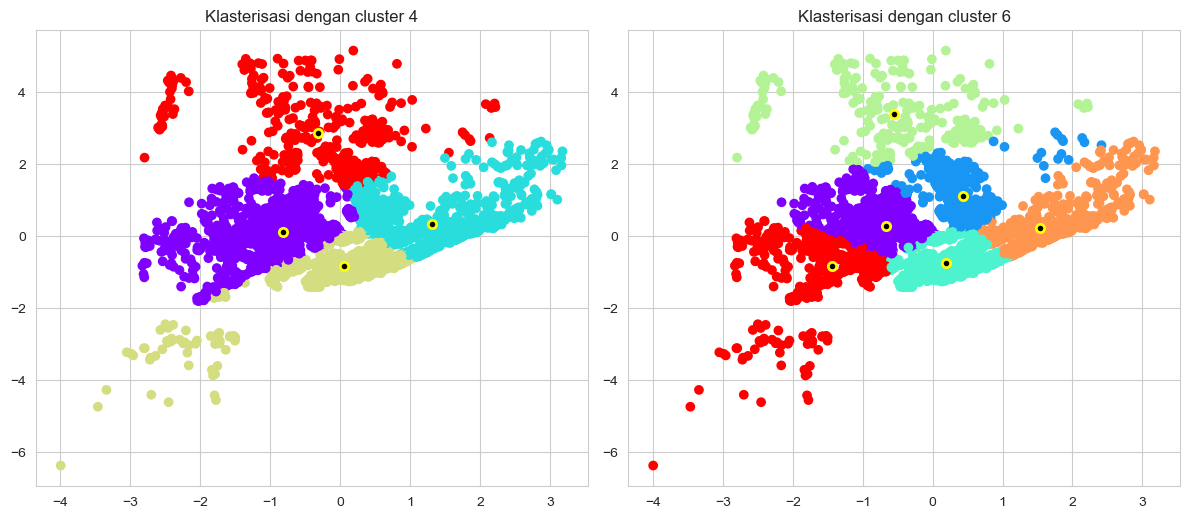

In [655]:
fig = plt.figure(figsize=(12,10))

plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=2)
plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)

# Plot for Age vs Wage
kmeans1 = KMeans(n_clusters = 4, init = 'k-means++', n_init ='auto', random_state = 32)
kmeans1.fit(X)
plot1.scatter(X1, X2, c=kmeans1.labels_, cmap='rainbow')
plot1.scatter(kmeans1.cluster_centers_[:, 0],
            kmeans1.cluster_centers_[:, 1],  color='black', edgecolors='yellow', linewidths=2)
plot1.set_title('Klasterisasi dengan cluster 4')

# Plot for Age vs Rating
kmeans2 = KMeans(n_clusters = kmax, init = 'k-means++', n_init ='auto', random_state = 32)
kmeans2.fit(X)
plot2.scatter(X1, X2, c=kmeans2.labels_, cmap='rainbow')
plot2.scatter(kmeans2.cluster_centers_[:, 0],
            kmeans2.cluster_centers_[:, 1],  color='black', edgecolors='yellow', linewidths=2)
plot2.set_title(f'Klasterisasi dengan cluster {kmax}')

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()